<a href="https://colab.research.google.com/github/sweta8144/Internship-Goeduhub/blob/main/PROJECT%20Corona_Virus_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries 
import numpy as np
import pandas as pd
#visualisation libraries
import matplotlib.pyplot as plt

#machine learning library
import sklearn
from sklearn.linear_model import LinearRegression

#importing preprocessing methods from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#importing preprocessor methods from sklearn
from sklearn.model_selection import train_test_split


In [ ]:
confirmed_case = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41405


In [ ]:
#reading the death record accross the world
deaths_reported = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,977


In [ ]:
#reading coronavirus recovered cases accross the world
recovered_cases = pd.read_csv('time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35082


In [ ]:
cols = confirmed_case.keys()
print (cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/14/21', '7/15/21', '7/16/21', '7/17/21', '7/18/21', '7/19/21',
       '7/20/21', '7/21/21', '7/22/21', '7/23/21'],
      dtype='object', length=553)


In [ ]:
confirmed = confirmed_case.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,78269
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178

In [ ]:
recovered= recovered_cases.loc[:, cols[4]:cols[-1]]

recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072,130074,130081,130086,130097,130109,130118
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992,105604,106337,107041,107776,108537,109349
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844,13844,13897,13930,13930,13988,13988
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732,34755,34790,34857,34893,35082,35082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,4236,4539,4590,4653,4733,5054,5229,5453,5546,5684,5759,5949,6137,6319,6519,6764,6840,7247,7395,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331,9553,9624,9688,10020,10312,10667,11047,11443,11971,13421,13421
260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,304138,304390,304777,305205,305658,306240,306240,306312,306532,306532,306532,307236,307236,307618,307892,307892,308186,308303,308413,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027,310027,310239,310329,310329,310525,310525,310601,310601,310961,310961,311380
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3765,3775,3781,3840,3846,3855,3953,3958,3980,3990,3995,4005,4019,4025,4032,4055,4068,4081,4082,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142,4147,4151,4154,4154,4156,4159,4162,4162,4162,4162,4163
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,98994,99895,100423,101885,103884,105960,108960,110450,111844,113109,115898,119411,121965,124582,126441,128312,131792,134419,137819,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239,163681,164924,166388,168052,169320,171699,173320,174728,175429,177419,179171


In [ ]:
deaths= deaths_reported.loc[:, cols[4]:cols[-1]]

deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,61,61,61,62,64,66,69,69,70,72,74,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3539,3542,3544,3545,3548,3550,3551,3554,3555,3555,3555,3556,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1350,1350,1351,1351,1352,1353,1355,1355,1355,1355,1356,1357,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1416,1444,1492,1525,1554,1595,1644,1691,1744,1794,1855,1915,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221


In [ ]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/14/21', '7/15/21', '7/16/21', '7/17/21', '7/18/21', '7/19/21',
       '7/20/21', '7/21/21', '7/22/21', '7/23/21'],
      dtype='object', length=549)

In [ ]:
world_cases=[]

total_deaths=[]

mortality_rate=[]

total_recovered=[]
india_cases=[]

for i in dates:

    confirmed_sum=confirmed[i].sum()

    print(confirmed[i])
    death_sum=deaths[i].sum()

    recovered_sum=recovered[i].sum()

    world_cases.append(confirmed_sum)

    total_deaths.append(death_sum)

    mortality_rate.append(death_sum/confirmed_sum)

    total_recovered.append(recovered_sum)
    #india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i.sum()])

Streaming output truncated to the last 5000 lines.
4         86
       ...  
274      328
275      451
276      399
277     1089
278      206
Name: 6/2/20, Length: 279, dtype: int64
0      17270
1       1184
2       9733
3        851
4         86
       ...  
274      328
275      457
276      419
277     1089
278      222
Name: 6/3/20, Length: 279, dtype: int64
0      18057
1       1197
2       9831
3        852
4         86
       ...  
274      328
275      464
276      453
277     1089
278      237
Name: 6/4/20, Length: 279, dtype: int64
0      18972
1       1212
2       9935
3        852
4         86
       ...  
274      328
275      464
276      469
277     1089
278      265
Name: 6/5/20, Length: 279, dtype: int64
0      19554
1       1232
2      10050
3        852
4         88
       ...  
274      329
275      464
276      482
277     1089
278      279
Name: 6/6/20, Length: 279, dtype: int64
0      20345
1       1246
2      10154
3        852
4         91
       ...  
274     

In [ ]:
print(confirmed_sum)
print(death_sum)
print(recovered_sum)
print(world_cases)
#print(mortality_rate)

193165622
4143105
126882306
[557, 655, 941, 1433, 2118, 2927, 5578, 6167, 8235, 9927, 12038, 16787, 19887, 23898, 27643, 30803, 34396, 37130, 40160, 42769, 44811, 45229, 60382, 66909, 69052, 71235, 73270, 75152, 75652, 76212, 76841, 78602, 78982, 79546, 80400, 81377, 82737, 84123, 86014, 88396, 90382, 92978, 95288, 98099, 102014, 106108, 110057, 114230, 119054, 126721, 132516, 146896, 157988, 169263, 184062, 200024, 219610, 246705, 277591, 309726, 344781, 387552, 428614, 479652, 542605, 607705, 674927, 734390, 799672, 876513, 959596, 1042614, 1126372, 1185537, 1256938, 1330329, 1400198, 1483591, 1570478, 1655871, 1730185, 1850116, 1921110, 2005385, 2082987, 2178472, 2266586, 2343741, 2420703, 2496253, 2572010, 2653355, 2737679, 2821852, 2904206, 2975551, 3045791, 3121471, 3198651, 3282194, 3370498, 3449587, 3524566, 3602345, 3682943, 3773104, 3861764, 3951900, 4037079, 4111911, 4188546, 4273058, 4358138, 4454276, 4550079, 4644427, 4722469, 4811597, 4908412, 5010541, 5117183, 5223556, 5

In [ ]:
#changing dates into days 
v=1
day_date=[]
for i in range(len(dates)):
    v=i*1
    day_date.append(v)
day_date

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


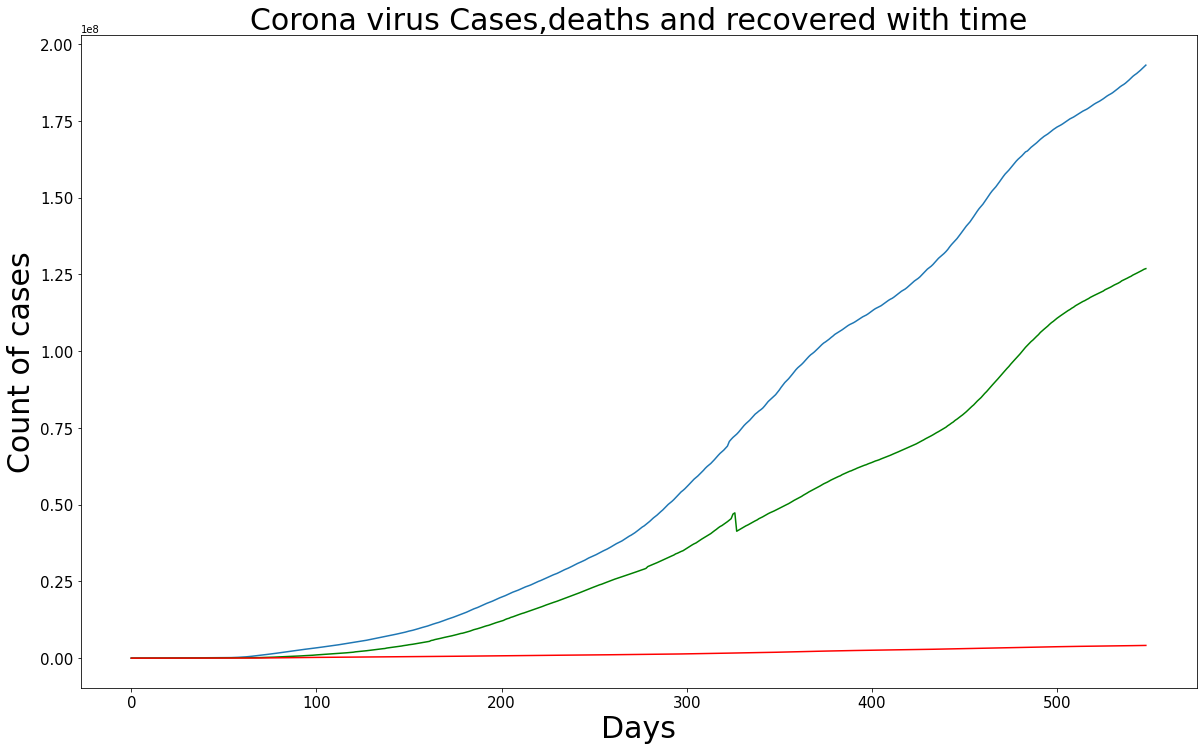

In [ ]:
#plotting the cases (confirmed, recovered and deaths) with time
plt.figure(figsize=(20,12))
plt.plot(day_date,world_cases)
plt.plot(day_date,total_recovered,color='green')
plt.plot(day_date,total_deaths,color='red')
plt.title("Corona virus Cases,deaths and recovered with time", size=30)
plt.xlabel("Days",size=30)
plt.ylabel("Count of cases", size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#check each day cases in world

def eachday_increase(records):
  d=[]
  for i in range(len(records)):
    if i==0:
      d.append(records[0])
    else:
      d.append(records[i]-records[i-1])
  return d

In [ ]:
world_daily_increase = eachday_increase(world_cases)
world_daily_increase

[557,
 98,
 286,
 492,
 685,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2143,
 2183,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 854,
 977,
 1360,
 1386,
 1891,
 2382,
 1986,
 2596,
 2310,
 2811,
 3915,
 4094,
 3949,
 4173,
 4824,
 7667,
 5795,
 14380,
 11092,
 11275,
 14799,
 15962,
 19586,
 27095,
 30886,
 32135,
 35055,
 42771,
 41062,
 51038,
 62953,
 65100,
 67222,
 59463,
 65282,
 76841,
 83083,
 83018,
 83758,
 59165,
 71401,
 73391,
 69869,
 83393,
 86887,
 85393,
 74314,
 119931,
 70994,
 84275,
 77602,
 95485,
 88114,
 77155,
 76962,
 75550,
 75757,
 81345,
 84324,
 84173,
 82354,
 71345,
 70240,
 75680,
 77180,
 83543,
 88304,
 79089,
 74979,
 77779,
 80598,
 90161,
 88660,
 90136,
 85179,
 74832,
 76635,
 84512,
 85080,
 96138,
 95803,
 94348,
 78042,
 89128,
 96815,
 102129,
 106642,
 106373,
 104597,
 94192,
 86641,
 93814,
 102743,
 119133,
 120810,
 136493,
 106289,
 96006,


In [ ]:
print(type(day_date))

<class 'list'>


In [ ]:
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(1,-1)
total_recovered = np.array(total_recovered).reshape(-1,1)
days = np.array(day_date).reshape(-1,1)
print(days.shape)

(549, 1)


In [ ]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [ ]:
future_forecast
adjusted_dates


array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days,world_cases,test_size=0.25,shuffle=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly_x_train_confirmed=poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed=poly.fit_transform(x_test_confirmed)
poly_future_forcast=poly.fit_transform(future_forecast)

In [ ]:
model = LinearRegression()
model.fit(poly_x_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
  test_pred = model.predict(poly_x_test_confirmed) # y_test_confirmed

In [ ]:
predictions = model.predict(poly_future_forcast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#mean square error
mean_squared_error(test_pred,y_test_confirmed)

1142829134699313.0

In [ ]:
mean_absolute_error(test_pred,y_test_confirmed)

29598146.502056476

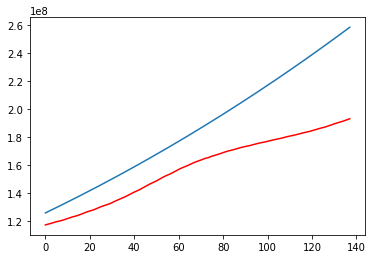

In [ ]:
plt.plot(y_test_confirmed,color='Red')
plt.plot(test_pred)